In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
# Set path to your dataset
train_dir = r"C:\Users\asus\Desktop\ResearchPaper for USA\final_dataset_split\train"
val_dir = r"C:\Users\asus\Desktop\ResearchPaper for USA\final_dataset_split\val"

# Image properties
img_size = (224, 224)
batch_size = 32
print(img_size)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 1491 images belonging to 3 classes.
Found 374 images belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6102 - loss: 0.8770 - val_accuracy: 0.6310 - val_loss: 0.8088
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6348 - loss: 0.8207 - val_accuracy: 0.6765 - val_loss: 0.7938
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6550 - loss: 0.7836 - val_accuracy: 0.6765 - val_loss: 0.8466
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6945 - loss: 0.7551 - val_accuracy: 0.6898 - val_loss: 0.7522
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6853 - loss: 0.7585 - val_accuracy: 0.6791 - val_loss: 0.7568
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6932 - loss: 0.7295 - val_accuracy: 0.6872 - val_loss: 0.7124
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6900 - loss: 0.7094 - val_accuracy: 0.6818 - val_loss: 0.7787
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6830 - loss: 0.7029 - val_accuracy: 0.6872 - val_loss:

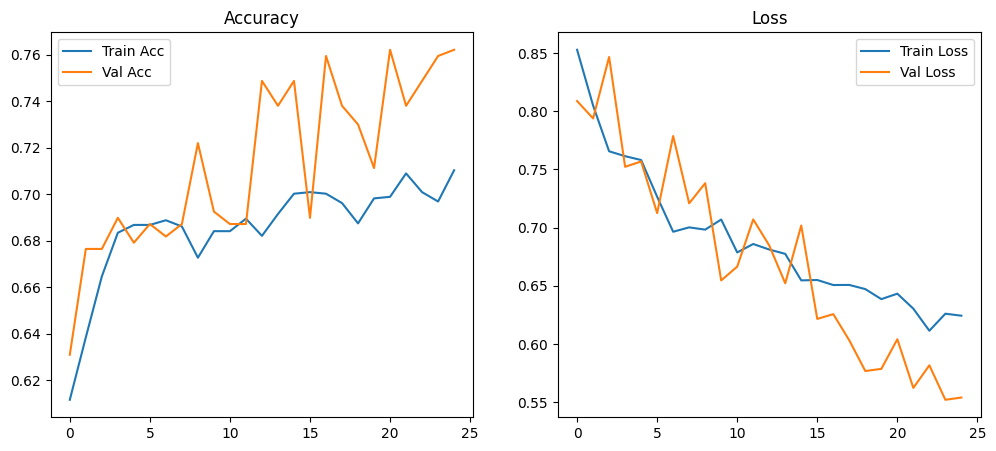

In [10]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [11]:
model.save("brain_stroke_classifier_model1.h5")
print("Model saved successfully.")


Model saved successfully.
